# Predictive Analytics

## Marlene Aviles

## Los Angeles Dodgers: Marketing Prediction

## Aim: Determine when the best time to run a promotion would be, day or night. 

Flow of this analysis will be as follws:
    
1. Understanding the buisness problem
    
2. Understanding the data

3. Feature Engineering 

4. Modeling/Personalization 

5. Communicate Results to team 

## 1. Understanding the buisness problem

The Los Angeles Dodgers professional baseball team is currently being affected by the COVID-19 pandemic like the rest of the world; this analysis will assist the marketing team in determining when the best time (night or day) is to run a promotion once the season resumes. 

## 2. Understanding the data

In [34]:
# libraries used
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction import DictVectorizer

In [45]:
# Data contains a total of 81 rows with 12 columns, data types vary per column 

df = pd.read_csv("dodgers.csv")
df.head(5)

,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead
0,APR,10,56000,Tuesday,Pirates,67,Clear,Day,NO,NO,NO,NO
1,APR,11,29729,Wednesday,Pirates,58,Cloudy,Night,NO,NO,NO,NO
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO
3,APR,13,31601,Friday,Padres,54,Cloudy,Night,NO,NO,YES,NO
4,APR,14,46549,Saturday,Padres,57,Cloudy,Night,NO,NO,NO,NO


## EDA

In [46]:
# Summary Statistics: range, histograms, etc 
df.shape # verify data loaded correctly 

(81, 12)

In [48]:
df.dtypes

month          object
day             int64
attend          int64
day_of_week    object
opponent       object
temp            int64
skies          object
day_night      object
cap            object
shirt          object
fireworks      object
bobblehead     object
dtype: object

The average attendance per game is 41,000 attendees; std is high for this variable.
The standard deviation for the day that attendees go to a Dodgers game is a lot smaller when compared to the total attendance numbers (~10 vs 8298). 
The average temperature of the games is around 73 degrees, reflective of Southern California's weather. The temperature variable should not be an issue, given no extreme temperatures are noted (54 degrees to 95 degrees).

In [32]:
df.describe() #shows only numerical variables 

,day,attend,temp
count,81.000000,81.000000,81.000000
mean,16.135802,41040.074074,73.148148
std,9.605666,8297.539460,8.317318
min,1.000000,24312.000000,54.000000
25%,8.000000,34493.000000,67.000000
50%,15.000000,40284.000000,73.000000
75%,25.000000,46588.000000,79.000000
max,31.000000,56000.000000,95.000000


In [53]:
# One hot enconding used on month, day_night, and day_of_week columns (convert to numeric) 
df2 =pd.get_dummies(df, columns=["month","day_night","day_of_week"]).head()
df2

,day,attend,opponent,temp,skies,cap,shirt,fireworks,bobblehead,month_APR,...,month_SEP,day_night_Day,day_night_Night,day_of_week_Friday,day_of_week_Monday,day_of_week_Saturday,day_of_week_Sunday,day_of_week_Thursday,day_of_week_Tuesday,day_of_week_Wednesday
0,10,56000,Pirates,67,Clear,NO,NO,NO,NO,1,...,0,1,0,0,0,0,0,0,1,0
1,11,29729,Pirates,58,Cloudy,NO,NO,NO,NO,1,...,0,0,1,0,0,0,0,0,0,1
2,12,28328,Pirates,57,Cloudy,NO,NO,NO,NO,1,...,0,0,1,0,0,0,0,1,0,0
3,13,31601,Padres,54,Cloudy,NO,NO,YES,NO,1,...,0,0,1,1,0,0,0,0,0,0
4,14,46549,Padres,57,Cloudy,NO,NO,NO,NO,1,...,0,0,1,0,0,1,0,0,0,0


In [57]:
# alternative to encoding a column 
from sklearn.preprocessing import LabelBinarizer
lb_style = LabelBinarizer()
lb_results = lb_style.fit_transform(df["day_of_week"])
pd.DataFrame(lb_results, columns=lb_style.classes_).head()

,Friday,Monday,Saturday,Sunday,Thursday,Tuesday,Wednesday
0,0,0,0,0,0,1,0
1,0,0,0,0,0,0,1
2,0,0,0,0,1,0,0
3,1,0,0,0,0,0,0
4,0,0,1,0,0,0,0


The distribution of attendance is not skewed to the far left or far right, meaning we are dealing with a normal distribution.

Text(0.5, 1.0, 'Attendance Distribution')

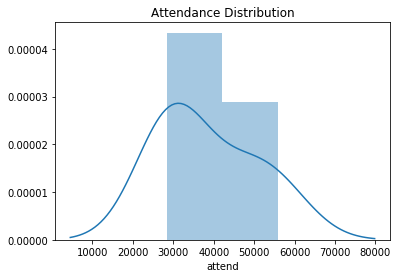

In [68]:
# Distribution of attendance looked at here 
sns.distplot(df2["attend"])
plt.title("Attendance Distribution", fontsize=12)

In [80]:
# Filter out numeric feautures from new df created 
numeric_feat = df.dtypes[df.dtypes != 'object'].index
numeric_feat

Index(['day', 'attend', 'temp'], dtype='object')

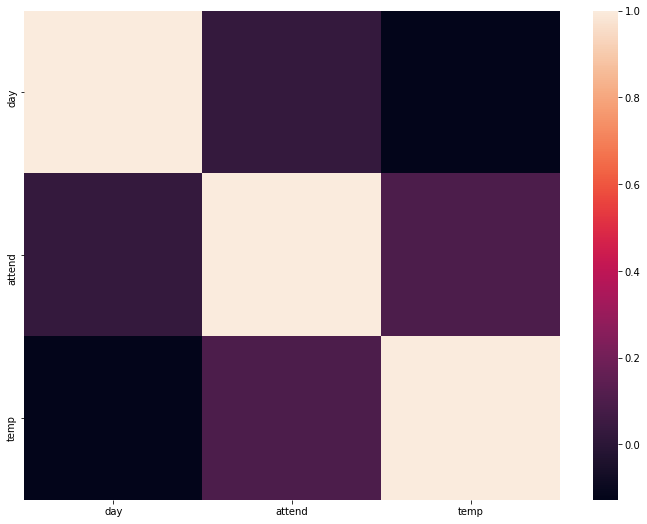

In [81]:
# Correlation matrix to see to look at correlation between the three variables of temp,attend, and day

cormat = df[numeric_feat].corr()
plt.subplots(figsize=(12,9))
sns.heatmap(cormat)

## Feature Engineering

In [138]:
# Removing target variable of "attend" from dataframe 
attendancedf = pd.get_dummies(df2)
attendancedf.head()

,day,attend,temp,month_APR,month_AUG,month_JUL,month_JUN,month_MAY,month_OCT,month_SEP,...,day_of_week_Wednesday,opponent_Padres,opponent_Pirates,skies_Clear,skies_Cloudy,cap_NO,shirt_NO,fireworks_NO,fireworks_YES,bobblehead_NO
0,10,56000,67,1,0,0,0,0,0,0,...,0,0,1,1,0,1,1,1,0,1
1,11,29729,58,1,0,0,0,0,0,0,...,1,0,1,0,1,1,1,1,0,1
2,12,28328,57,1,0,0,0,0,0,0,...,0,0,1,0,1,1,1,1,0,1
3,13,31601,54,1,0,0,0,0,0,0,...,0,1,0,0,1,1,1,0,1,1
4,14,46549,57,1,0,0,0,0,0,0,...,0,1,0,0,1,1,1,1,0,1


## Model Creation

Apply models with cross validation ( GradientBoostRegressor & Logistic regression models)

In [162]:
#Split Test/Training
from sklearn.model_selection import train_test_split

X= attendancedf.drop(["attend"], axis=1)
y =attendancedf["attend"]

# 25% of data will be used for testing  
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25)

In [163]:
#Normalized the data using MinMaxScaler

from sklearn.preprocessing import MinMaxScaler
# create scaler
scaler = MinMaxScaler()
# Create the scaler object with a range of 0-1
scaler = MinMaxScaler(feature_range=(0, 1))
# Fit on the training data
scaler.fit(X)
# Transform both the training and testing data
X = scaler.transform(X)
X_test = scaler.transform(X_test)

In [164]:
from sklearn.ensemble import GradientBoostingRegressor
# Create the model
gradient_boosted = GradientBoostingRegressor()

# Fit the model on the training data
gradient_boosted.fit(X, y)

# Make predictions on the test data
predictions = gradient_boosted.predict(X_test)

# Evaluate the model
mae = np.mean(abs(predictions - y_test))

print('Gradient Boosted Performance on the test set: Mean Absolute Error = %0.4f' % mae)

# randomstate = 0 increaes Mean Absolute error to .44 doubles!

Gradient Boosted Performance on the test set: MAE = 0.2275


Accuracy: 0.0


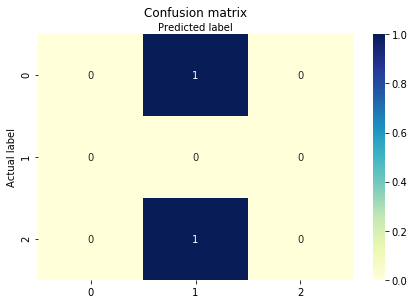

In [178]:
# Logistic Regression 
from sklearn.linear_model import LogisticRegression
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

logreg = LogisticRegression()

# fitting model with data
logreg.fit(X_train,y_train)


y_pred=logreg.predict(X_test)

from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)



# heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Results / Model Evaluation 

Observations:
The best model was the GradienBoostingRegressor which showed an MAE of 0.23. 
The correlation between the attendance and the day of the game is not signifcant (0.0271).
The corelation between the attendance and day of the game when looking at day versus night attendance is also not significant. Day Correlation = 0.06, Night Correlation = 0.02


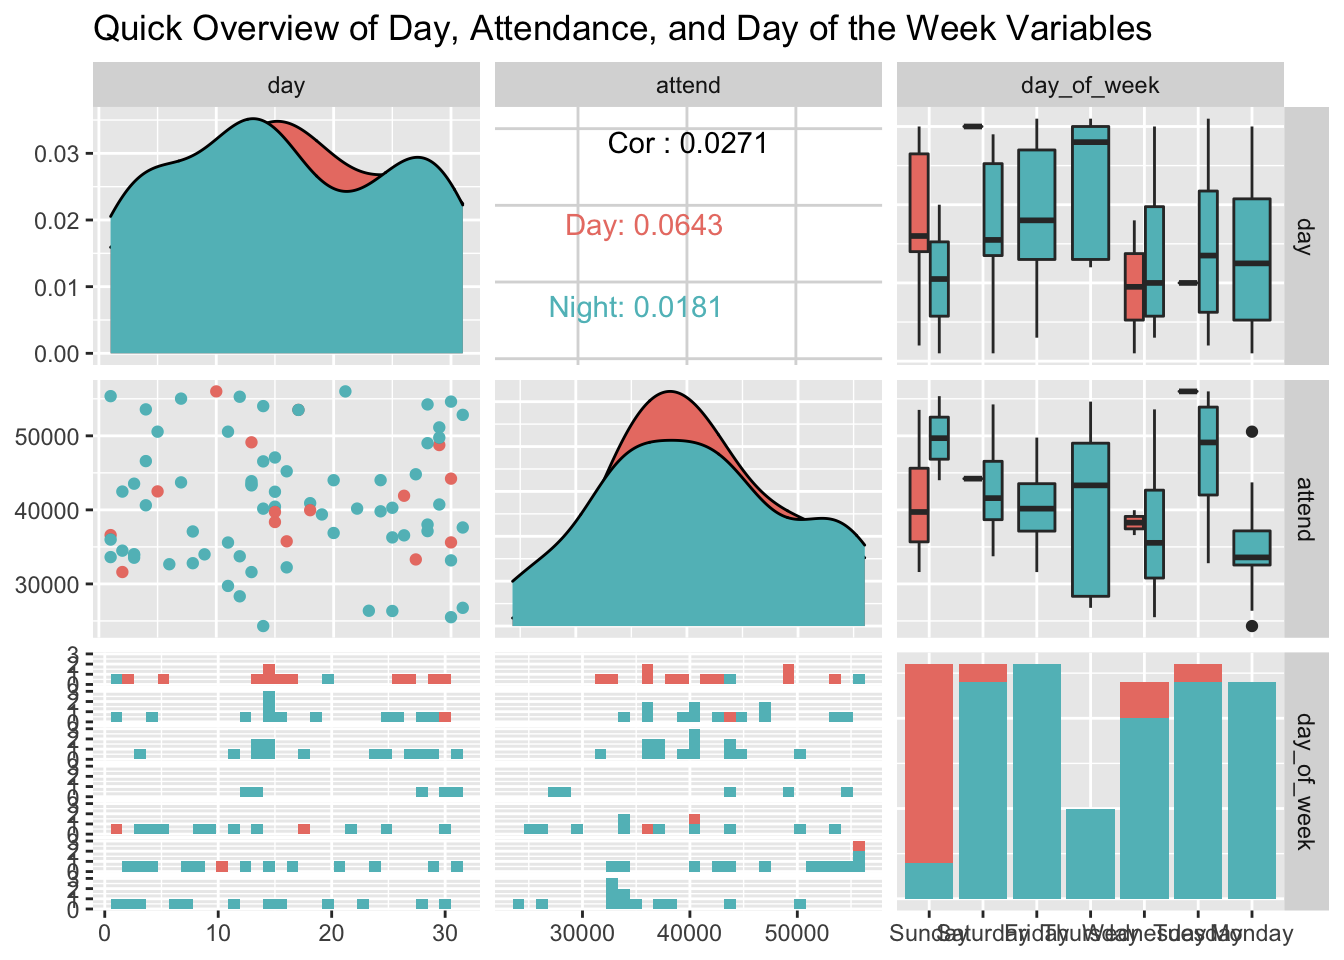

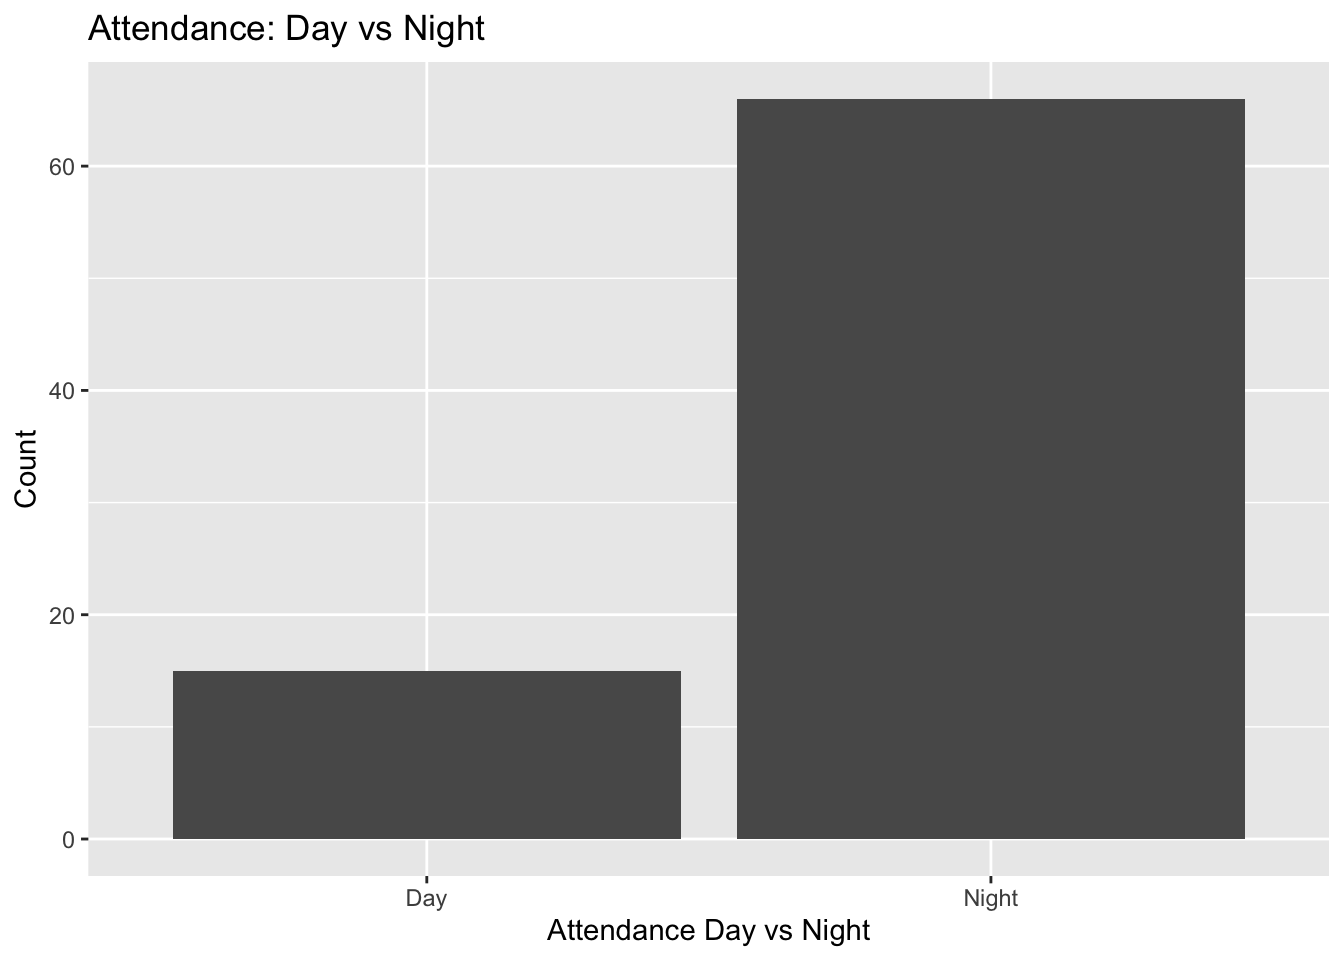

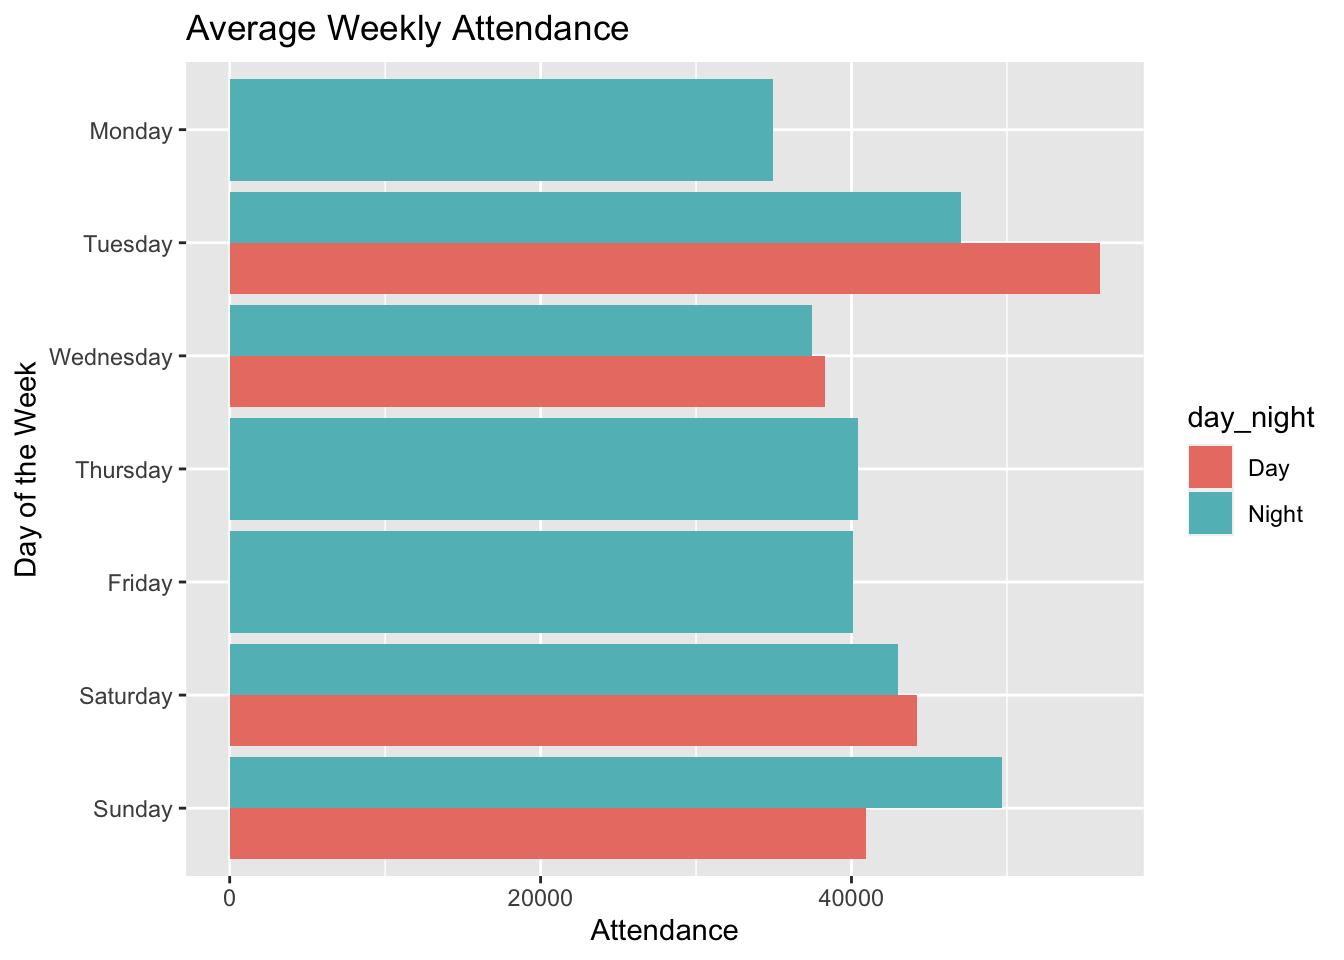

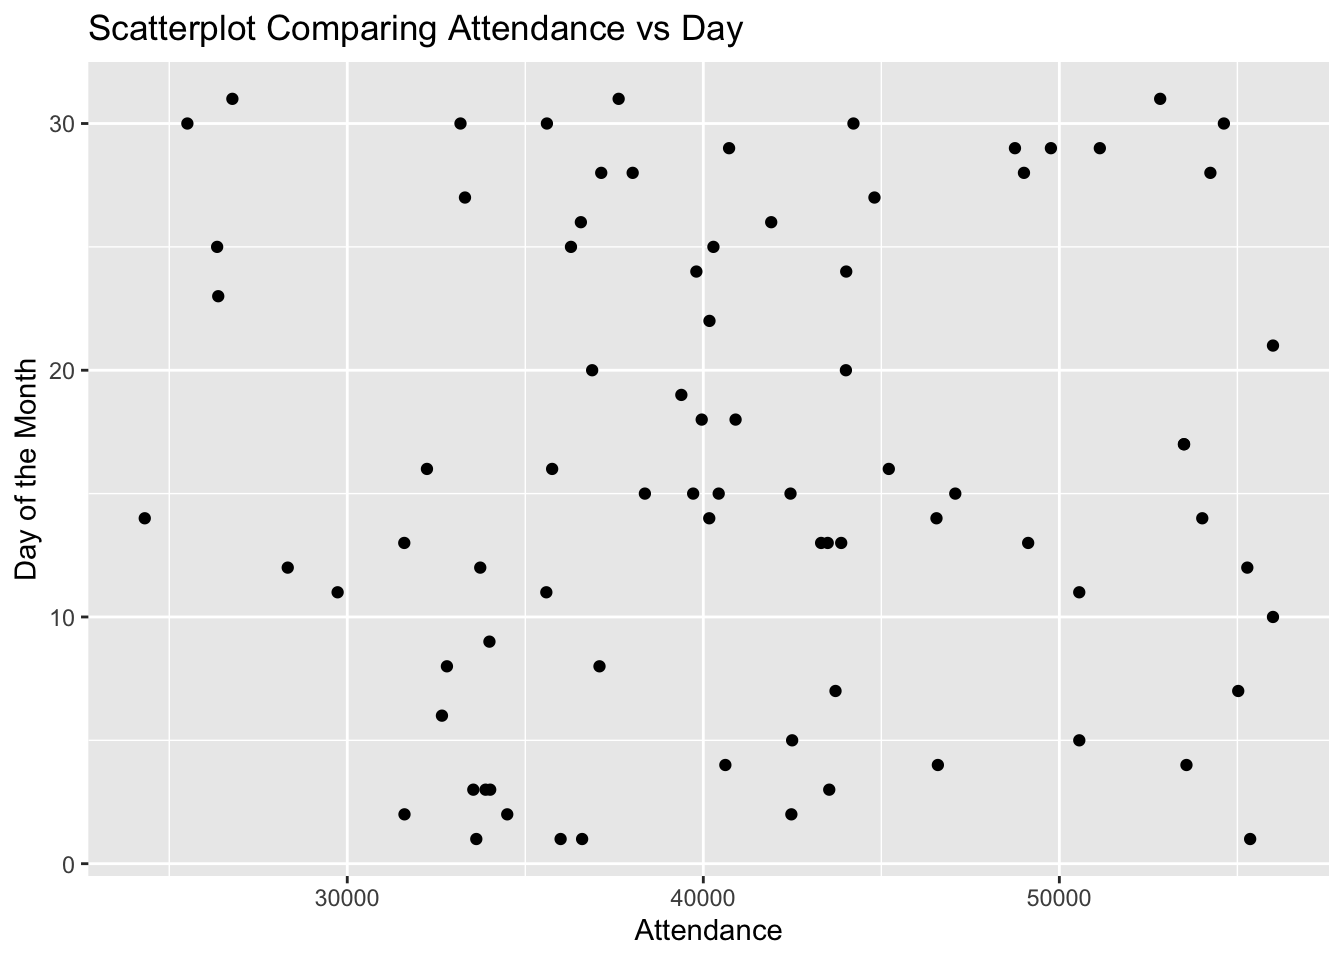

## Determination for best time: 

According to the analysis the marketing team is advised to run their campaign on the weekends (Saturday and Sunday) during the night. 